<a href="https://colab.research.google.com/github/PinKevin/Alpro-B2/blob/main/Prak%3D4/Pertemuan_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Impor modul

In [27]:
import numpy as np
import pandas as pd
from scipy import ndimage
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix
from scipy.spatial.distance import squareform
from matplotlib import pyplot as plt
from sklearn import manifold, datasets
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
%matplotlib inline

Generate Random Data

In [28]:
X1, y1 = make_blobs(n_samples=50, centers=[[4,4], [-2,-1], [1,1], [10,4]], cluster_std=0.9)

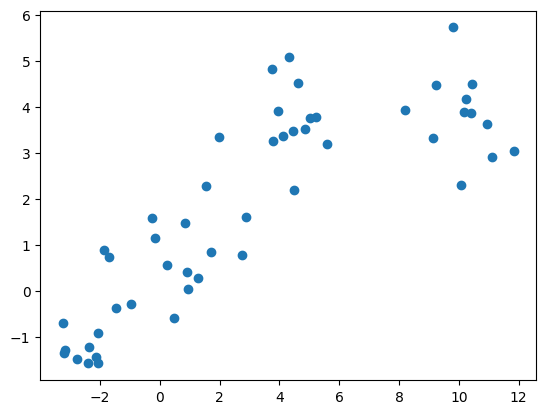

In [29]:
plt.scatter(X1[:, 0], X1[:, 1])

Agglomerative Clustering

In [30]:
agglom = AgglomerativeClustering(n_clusters=4, linkage='single')
agglom.fit(X1, y1)

AgglomerativeClustering(linkage='single', n_clusters=4)

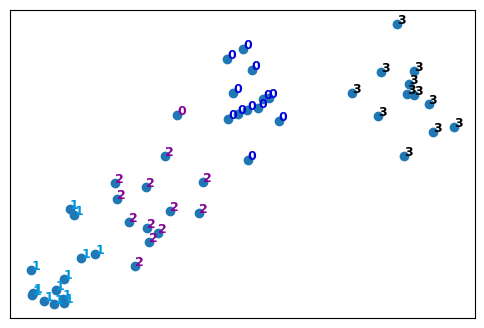

In [31]:
plt.figure(figsize=(6,4))

# Min Max range of X1
x_min, x_max = np.min(X1, axis=0), np.max(X1, axis=0)

# Average distance of X1
X1 = (X1 - x_min) / (x_max - x_min)

'''
 Loop shows all of datapoints,
  replace data points with respective cluster values
'''
for i in range(X1.shape[0]):
  plt.text(X1[i, 0], X1[i, 1], str(y1[i]),
           color=plt.cm.nipy_spectral(agglom.labels_[i] / 10.),
           fontdict={'weight': 'bold', 'size': 9})

# Hapus x, y ticks dan x & y axis
plt.xticks([])
plt.yticks([])
# plt.axis('off')

plt.scatter(X1[:, 0], X1[:, 1])
plt.show()

Plotting dendogram

In [32]:
dist_matrix = distance_matrix(X1, X1)
condensed_dist_matrix = squareform(dist_matrix)

# print(dist_matrix)
print(condensed_dist_matrix)

[0.88037259 0.49710055 0.39008199 ... 0.85477901 0.0726011  0.82199967]


In [33]:
Z = hierarchy.linkage(condensed_dist_matrix, 'complete')
X = hierarchy.linkage(condensed_dist_matrix, 'single')
Y = hierarchy.linkage(condensed_dist_matrix, 'average')

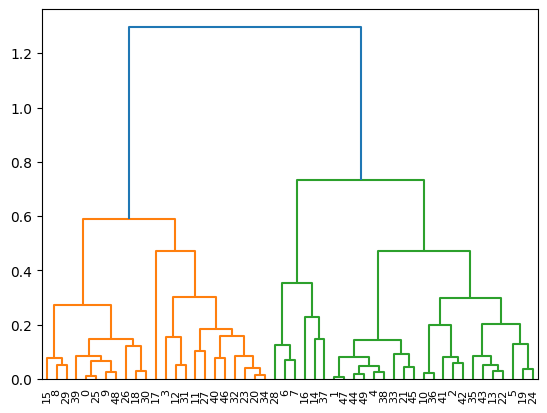

In [34]:
dendro = hierarchy.dendrogram(Z)

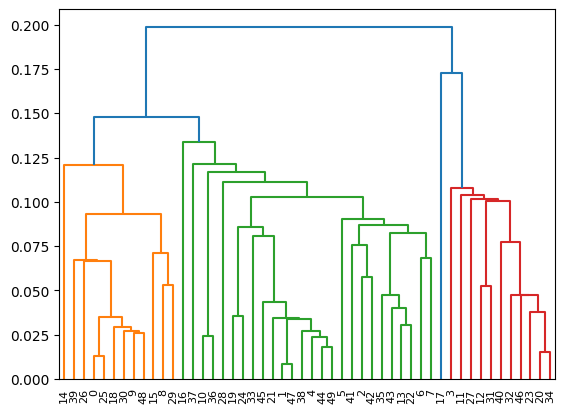

In [35]:
dendro = hierarchy.dendrogram(X)

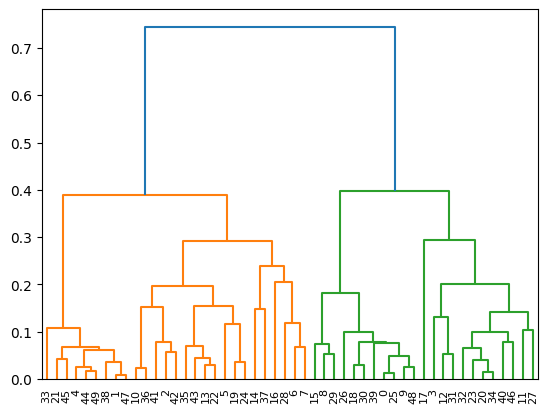

In [36]:
dendro = hierarchy.dendrogram(Y)